<a href="https://colab.research.google.com/github/yqz5514/Reg-Stats-Coding-Project/blob/main/Active_Actions_Published_in_the_Unified_Agenda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content

In [2]:
install.packages("R.utils")
library("R.utils")
# runtime: within 1 min

install.packages('png') # use for load png file
install.packages('showtext') #directly works on .OTF fonts, for custom font on ggplot
install.packages('ggpattern') # for plot pattern
install.packages('ggrepel') # legend
# load packages
library(ggplot2)
library(showtext)
library(png)
library(ggpattern)
library(tidyr)
library(ggrepel)
library(dplyr)
library(scales)

# runtime 12 mins

# Dowloading logo and font style for reg stats plots
# download.file("https://raw.githubusercontent.com/yqz5514/Reg-Stats-Coding-Project/main/gw_ci_rsc_2cs_pos.png",
#               "gw_ci_rsc_2cs_pos.png.gz")
# download.file("https://github.com/yqz5514/Reg-Stats-Coding-Project/raw/main/a-avenir-next-lt-pro.otf",
#               "a-avenir-next-lt-pro.otf.gz")
# gunzip('gw_ci_rsc_2cs_pos.png.gz')
# gunzip('a-avenir-next-lt-pro.otf.gz')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [3]:
mytheme <- theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, vjust=-2, margin = margin(b = 40, unit = "pt"), size=20),
    axis.text.x = element_text(angle = 65, hjust = 1, vjust = 1,size=12),
    legend.position = "none",
    panel.grid.major.x = element_blank(),
    axis.text.y = element_text(size=12),
    axis.title.y = element_text(size = 12, angle = 90, vjust = 1),
    panel.grid.major.y = element_line(color = "#E0E0E0", linetype = "solid"),
    panel.grid.minor = element_blank(),
    text =element_text(family = "avenir_lt_pro"),
    plot.caption = element_text(hjust = 1, margin = margin(t = 0, l = 6, unit = "pt"),size=11),
    plot.margin = margin(50, 50, 50, 50),
    axis.ticks.x = element_line()
  )

In [5]:
# download ES rules published data

download.file("https://raw.githubusercontent.com/yqz5514/Reg-Stats-Coding-Project/main/data/Active%20Actions%20Listed%20in%20the%20Unified%20Agenda_071023.csv",
              "Active%20Actions%20Listed%20in%20the%20Unified%20Agenda_071023.csv.gz")
gunzip('Active%20Actions%20Listed%20in%20the%20Unified%20Agenda_071023.csv.gz')

#Dowloading logo and font style for reg stats plots
download.file("https://raw.githubusercontent.com/yqz5514/Reg-Stats-Coding-Project/main/gw_ci_rsc_2cs_pos.png",
              "gw_ci_rsc_2cs_pos.png.gz")
download.file("https://github.com/yqz5514/Reg-Stats-Coding-Project/raw/main/a-avenir-next-lt-pro.otf",
              "a-avenir-next-lt-pro.otf.gz")
gunzip('gw_ci_rsc_2cs_pos.png.gz')
gunzip('a-avenir-next-lt-pro.otf.gz')

In [6]:
#data process
df1 <- read.csv("/content/Active%20Actions%20Listed%20in%20the%20Unified%20Agenda_071023.csv")

df1_1 <- df1[c(3:48),c(0:5)]

colnames(df1_1) <- c("yearseason", "FinalRules", "ProposedRules","Prerules","Total")

df1_1$Total <- as.numeric(df1_1$Total)

df1_1$sort <- seq.int(nrow(df1_1))

#df1_1
data_new1 <- df1_1 %>% arrange(desc(sort))

data_new1$yearseason <- factor(data_new1$yearseason, levels=unique(data_new1$yearseason))


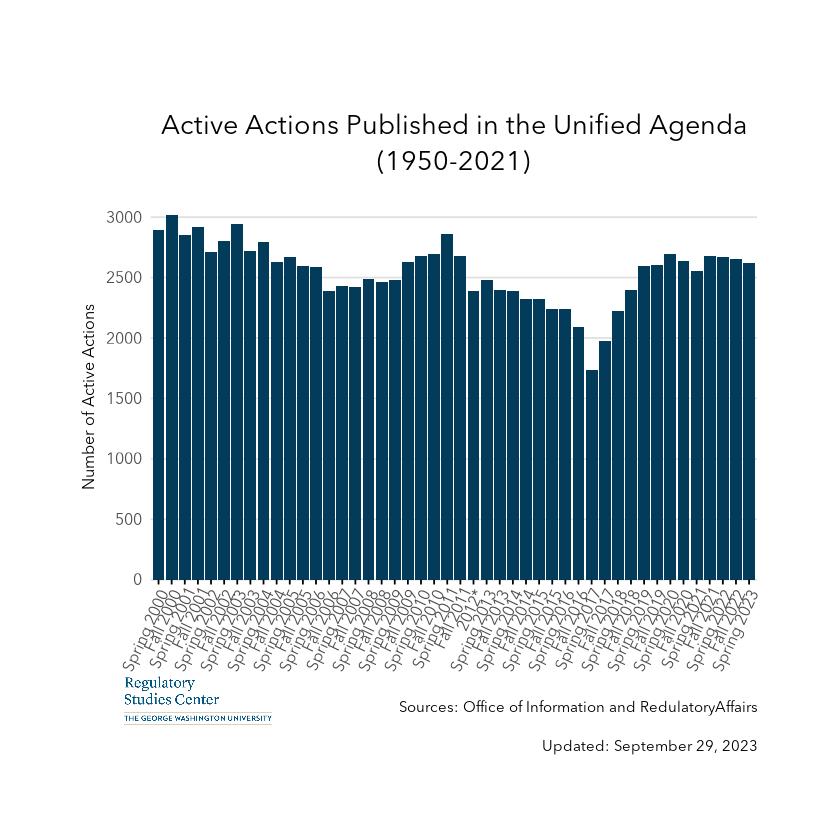

In [18]:
#logo
get_png <- function(filename) {
  grid::rasterGrob(png::readPNG(filename),interpolate = TRUE)
}

l <- get_png("gw_ci_rsc_2cs_pos.png")

#annotation
current_date <- format(Sys.Date(), "%B %d, %Y")
caption_text <- paste("Sources: Office of Information and RedulatoryAffairs \n\nUpdated:", current_date)
wrapped_caption <- paste(strwrap(caption_text, width = 95), collapse = "\n")

#font
font_add("avenir_lt_pro","a-avenir-next-lt-pro.otf")
showtext_auto()

#plot
bar2 <-
  ggplot(data=data_new1, aes(x=yearseason, y=Total)) +
  geom_bar(stat="identity", fill="#033C5A")+

  ggtitle("Active Actions Published in the Unified Agenda \n(1950-2021)") +
  ylab("Number of Active Actions") +
  xlab("") +
  mytheme+
  scale_y_continuous(breaks = seq(0, max(data_new1$Total), by = 500), expand = c(0, 0),
                     limits = c(-2, max(data_new1$Total)),) +
                     #labels = label_number(suffix = "K", scale = 1e-3)) +
  # scale_y_continuous()
  annotation_custom(l, xmin = -2, xmax = 10, ymin = -800, ymax = -1200) + # for logo
  # logo_y_dim = 0.3logo_y_max, logo_x_dim = 0.12logo_x_max ?
  coord_cartesian(clip = "off") +
  labs(caption = wrapped_caption)


bar2
ggsave("bar2.pdf", plot = bar2, width = 12, height = 9, dpi = 300)